# Demonstration Timbre Transfer of Ensemble
This notebook demonstrates how an ensemble sounds like if the timbre is transfered from virtual instruments from the SLAKH dataset to timbre that is generated by DDSP based on real world recordings.

In [12]:
# Cut audio
from dataloader_slakh import SlakhDataset
import os
# import numpy as np
from IPython.display import Audio, display
import matplotlib.pyplot as plt
from pydub import AudioSegment
import soundfile as sf

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\User\anaconda3\envs\source_sep\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


['Drums', 'Electric Piano 1', 'Trumpet', 'Fretless Bass', 'String Ensemble 1', 'String Ensemble 1', 'Electric Guitar (clean)', 'French Horn', 'Trombone', 'Alto Sax', 'Electric Guitar (jazz)', 'Overdriven Guitar', 'Muted Trumpet', 'Flute', 'Vibraphone']
['Fretless Bass', 'Alto Sax', 'Vibraphone']


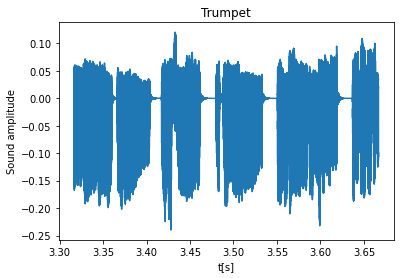

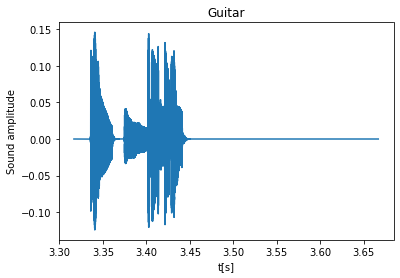

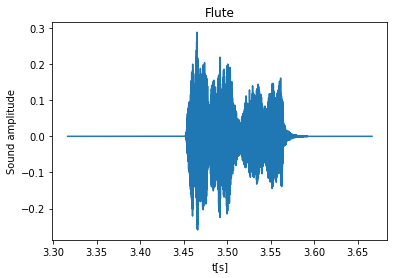

In [36]:
# Get Audio Snippet
TARGET = "Trumpet"
train_dataset = SlakhDataset(target=TARGET,seq_duration=5.0)
validation_dataset = SlakhDataset(target=TARGET,split='validation',seq_duration=5.0)

i = 0
print([train_dataset.tracks[i].targets[j].instrument for j in range(len(train_dataset.tracks[i].targets))])
# print(train_dataset.tracks[0].targets)
print([train_dataset.tracks[i].targets[j].instrument for j in [3,-6,-1]])

audios = [train_dataset.tracks[i].targets[j].get_total_audio() for j in [2,-5,-2]]

# Cut Audio
t = np.linspace(0,4+0.06/60*100,len(audios[0]))
t_1 = 3 + (.19 / 60*100)
t_2 = 3 + (.4 / 60*100)
t_cut_ = t[t>t_1]
t_cut = t_cut[t_cut<t_2]

audios_cut = []
titles = ["Trumpet", "Guitar", "Flute"]
for i,a in enumerate(audios):
    cut = a[t>t_1]
    cut = np.array(cut[t_cut_<t_2])
    audios_cut.append(cut)
    sf.write("data/audio/example_"+titles[i]+".wav",cut, 44_100)

display(Audio(np.sum(np.array(audios_cut),axis=0), rate=44100))
for i, audio_ in enumerate(audios_cut):
    display(Audio(audio_, rate=44100))
    plt.figure()
    plt.plot(t_cut, audio_)
    plt.title(titles[i])
    plt.ylabel("Sound amplitude")
    plt.xlabel("t[s]")


In [ ]:
# Transfer in Google Colab

In [ ]:
# Combine and play